In [19]:
pip install numpy==2.2.5 joblib==1.5.0 pandas==2.2.3 scikit-learn==1.6.1 matplotlib==3.10.3

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [42]:
# Loading Dataset in DataFrame

df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.tail(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


# Data Pre-Processing

In [43]:
# Grouping Using Area Type
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [44]:
# Dropping Irrelevant Columns
df2=df1.drop(['area_type','availability','balcony','society'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [45]:
# Checking Null Values in Dataset & Dropping Null rows
df2.isnull().sum()
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [48]:
# Handling Similar Values
df3['size'].unique()
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

/var/folders/fl/2213bsss3rv19yw5r6yzqnr00000gn/T/ipykernel_20699/2457494513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [49]:
# Tackeling Range Values

def is_float(x):
    try:
        x=float(x)
    except:
        return False
    return True

In [50]:
df3[~df3['total_sqft'].apply(is_float)]                                                           # (~) means similar to !.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [51]:
# Converting Range To Number

def range_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None

In [52]:
# Stroring Values in New DataFrame
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(range_to_num)
df4.tail(3)

,location,size,total_sqft,bath,price,bhk
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4
13319,Doddathoguru,1 BHK,550.0,1.0,17.0,1


# Feature Scaling

In [53]:
# Adding New attribute ~ Price Per Square Foot in Rs.
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000//df5['total_sqft']
df5.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689.0
13316,Richards Town,4 BHK,3600.0,5.0,400.0,4,11111.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407.0
13319,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090.0


In [55]:
# Checking Total locations in dataset
len(df5['location'].unique())
# No. of locations are way to Much, i.e. we are facing dimensionality curse or high dimensionality problem

1304

In [56]:
# Tackling Highdimensionality Problem
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(location_stats[location_stats<=10])

1052

In [57]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [58]:
df5.location=df5.location.apply(lambda x:'Other' if x in location_stats_less_than_10 else x)

In [59]:
# Outlier Detection & Removal
df5[df5.total_sqft/df5.bhk<300].head()
df5.shape

(13246, 7)

In [60]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.085501
std        4168.128423
min         267.000000
25%        4210.000000
50%        5294.000000
75%        6916.000000
max      176470.000000
Name: price_per_sqft, dtype: float64

In [61]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [62]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

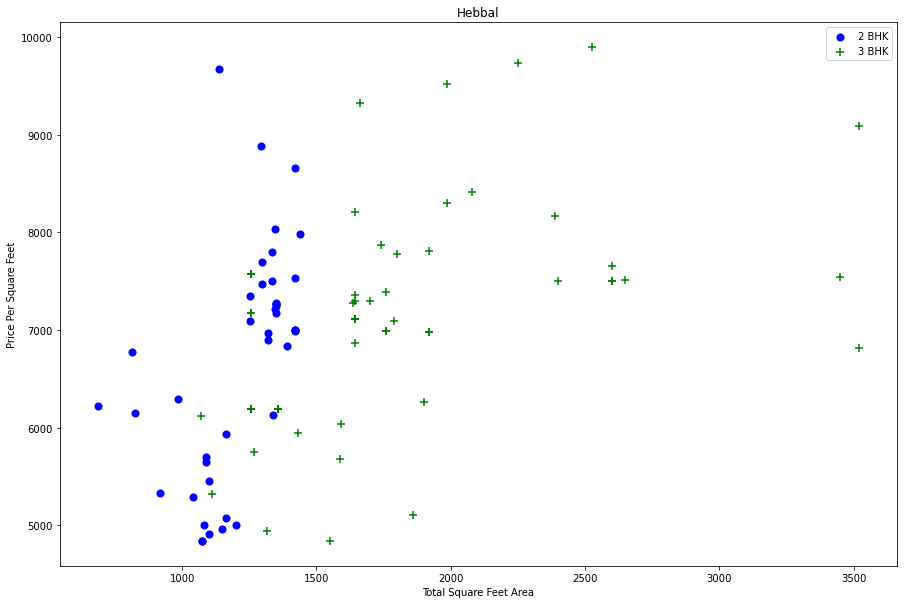

In [ ]:
plot_scatter_chart(df7,'Hebbal')

In [63]:
def remove_bhk_outliers(df):
    exclude_indicies=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indicies=np.append(exclude_indicies,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indicies,axis=0)

df8=remove_bhk_outliers(df7)
df8.shape

(7329, 7)

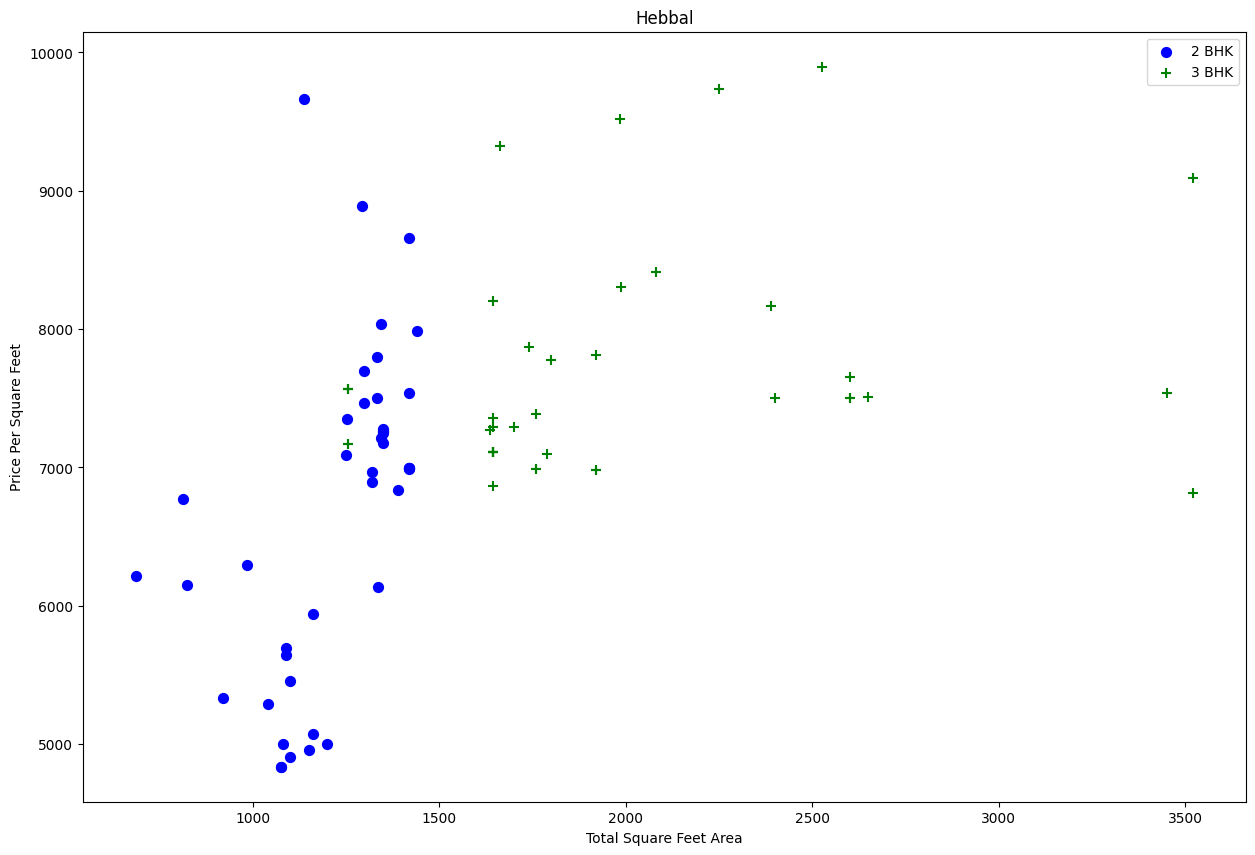

In [64]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'Count')

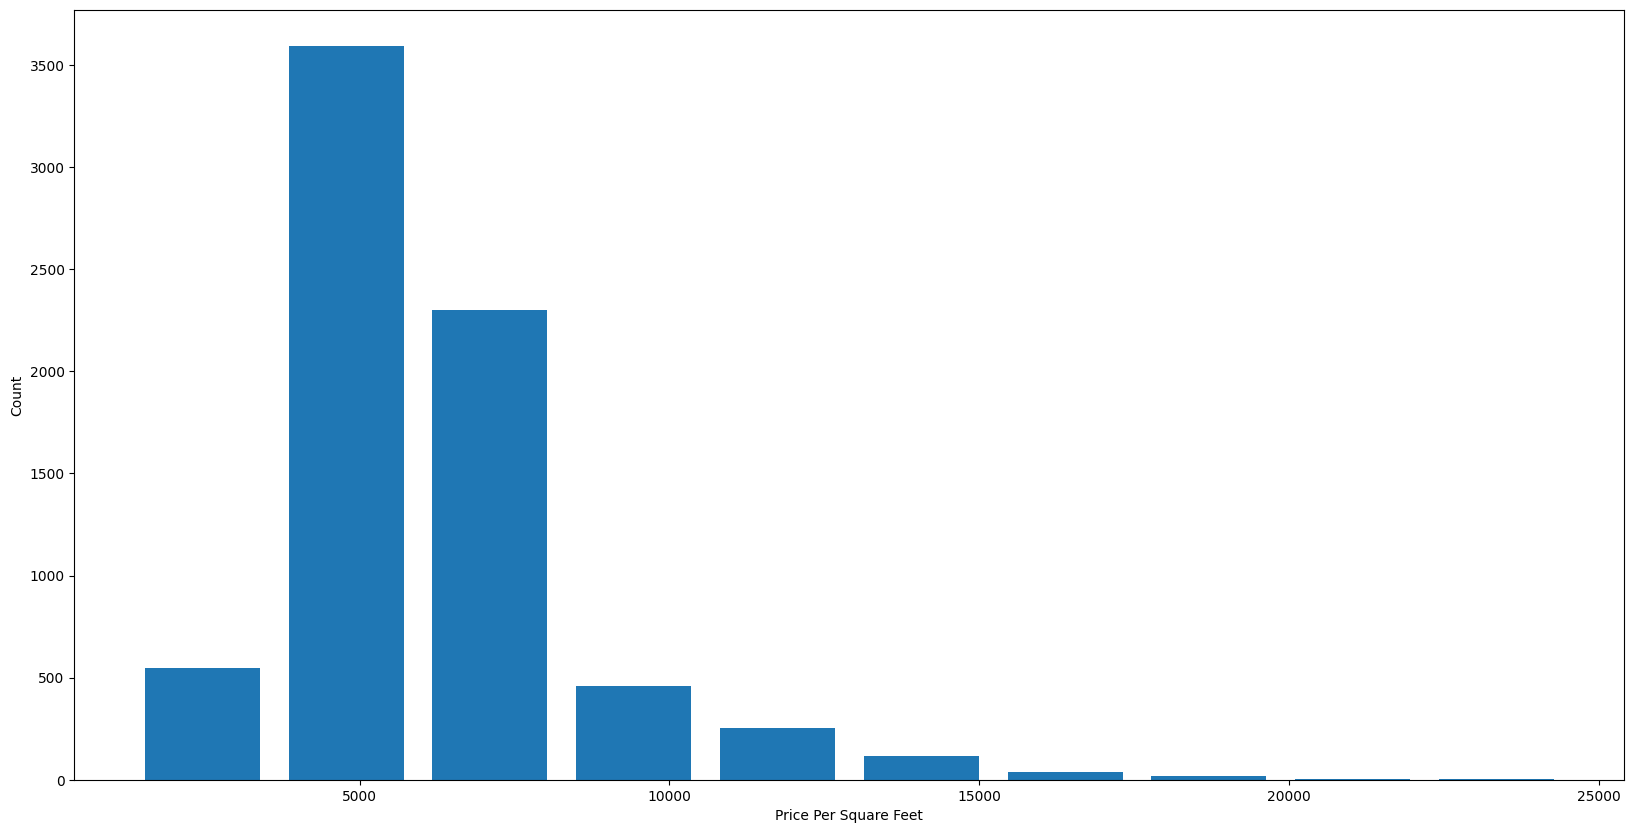

In [65]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [66]:
# Checking Outliers for Bathrooms
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [67]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.0
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.0
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.0
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.0
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.0


Text(0, 0.5, 'Count')

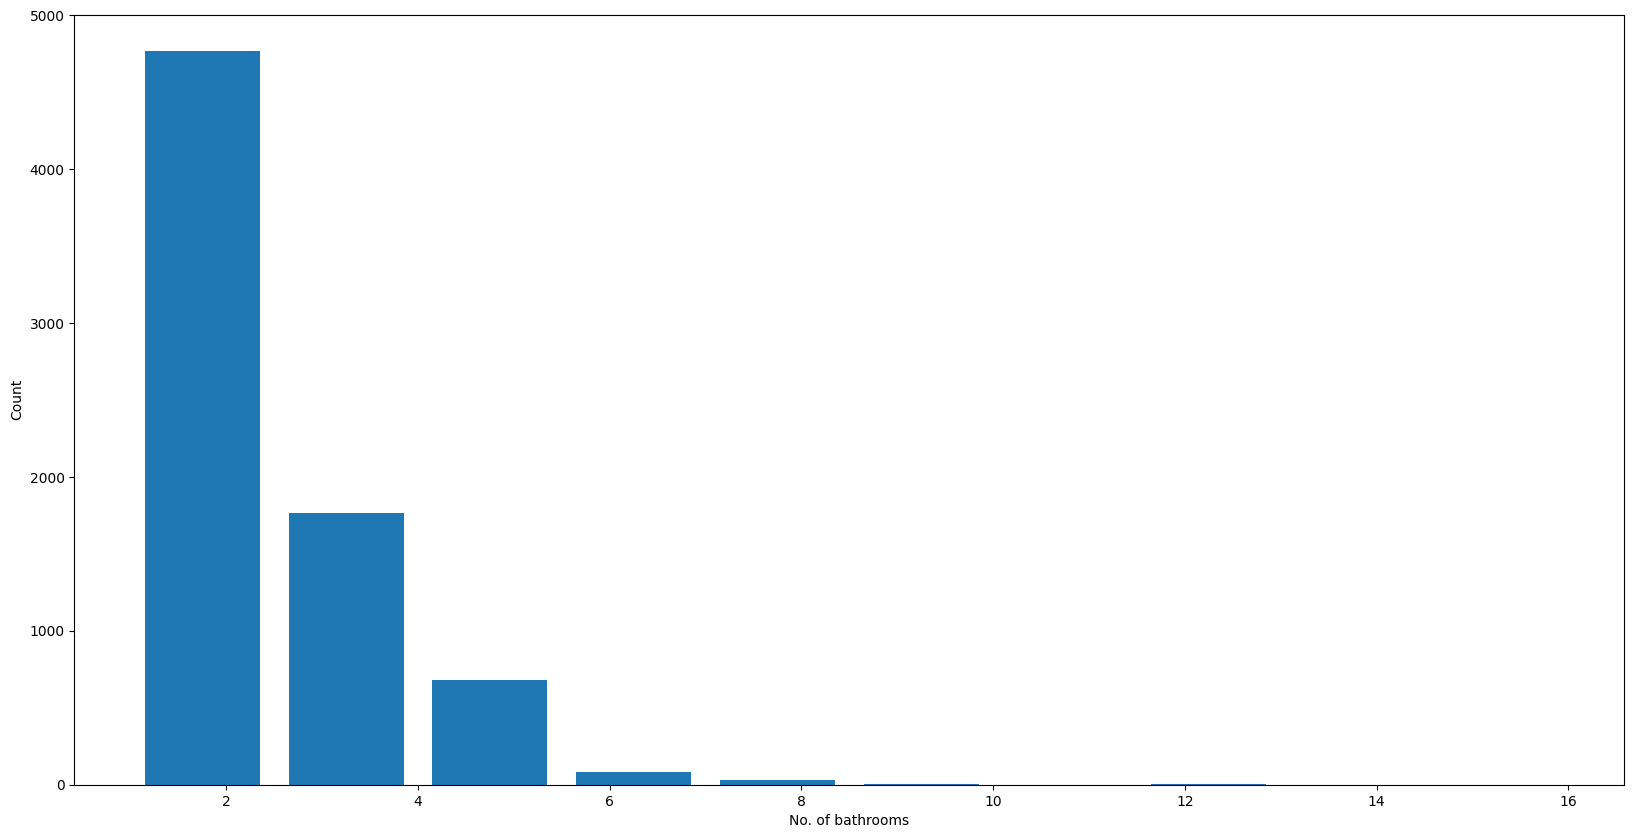

In [68]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('No. of bathrooms')
plt.ylabel('Count')

In [69]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.0
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.0
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0


In [70]:
# Removing Un-Necessary Columns & Outliers
df9=df8[df8.bath<df8.bhk+2]
df10=df9.drop(['size','price_per_sqft'],axis=1)

In [71]:
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [72]:
# Since Models Can't Work directly on text, We will create dummy variables for that.
dummies=pd.get_dummies(df10.location)

In [73]:
# Concatinating Dummies with Orignal Data Frame & Dropping Text Column
df11=pd.concat([df10,dummies.drop('Other',axis=1)],axis=1)
df12=df11.drop('location',axis=1)

In [74]:
# Dumping final DataFrame to CSV File
df12.to_csv('predictifire.csv', encoding='utf-8',index=False)

In [75]:
# Differntaiting InDependent(X) variables & Dependent (Y) variable
X=df12.drop('price',axis=1)
Y=df12.price

In [76]:
# splitting Model Into Training & Testing Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [77]:
# Training Model With Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8691922948188173

In [78]:
# Using cross Validation on Dataset
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.85430817, 0.84187614, 0.84728416, 0.85171769, 0.87168081])

In [82]:
# Using GridSearchCV on dataset
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Finding Best Model Using GridSearchCV

def find_best_model_gridsearchCV(X,Y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'lasso':{
         'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }        
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_gridsearchCV(X,Y)

/opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

,model,best_score,best_params
0,linear_regression,0.853373,{}
1,lasso,0.727629,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.688417,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [83]:
# Making Function to Predict Price
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
        

In [84]:
l=['1st Phase JP Nagar',1000,2,2]
predict_price(l[0],l[1],l[2],l[3])

/opt/homebrew/Cellar/jupyterlab/4.4.2/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(82.81981042813769)

In [85]:
# Export the tested model to a pickle file
import pickle
with open('predictifire.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [86]:
#Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [87]:
# Exporting Model Using Joblib
from joblib import dump, load
dump(lr_clf, 'predictifire.joblib') 

['predictifire.joblib']

In [91]:
import joblib
res=joblib.load('predictifire.joblib')
# Making Function to Predict Price
def predict_price1(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return "%.2f" % res.predict([x])[0]